In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns 

import missingno as ms
# use cyperpunk theme for more interesting visualization
import mplcyberpunk
plt.style.use("cyberpunk")

C:\Users\ae504\AppData\Local\Temp\ipykernel_9024\3657916697.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# <span style="font-weight:700;color:#fff;background-color:#003333;border-radius:10px;padding:10px"> Loading and EDA <span>

In [2]:
df = pd.read_csv("../data/Xeek_train_subset_clean.csv")

In [3]:
df.head()

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-13,494.528,NORDLAND GP.,NaN,19.480835,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,Shale
1,15/9-13,494.680,NORDLAND GP.,NaN,19.468800,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,Shale
2,15/9-13,494.832,NORDLAND GP.,NaN,19.468800,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,Shale
3,15/9-13,494.984,NORDLAND GP.,NaN,19.459282,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,Shale
4,15/9-13,495.136,NORDLAND GP.,NaN,19.453100,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,Shale


### What are these logs
1. `RDEP`: Resistivity Deep. It refers to the measurement of formation resistivity at a relatively large spacing from the wellbore. RDEP helps determine the resistivity of the rock formation and is used to evaluate fluid saturation and lithology.

2. `RHOB`: Bulk Density. RHOB represents the measurement of bulk density, which provides information about the density of the formation. It helps in determining porosity, lithology, and mineralogy.

3. `GR`: Gamma Ray. GR logging measures the natural radioactivity emitted by the formation. The gamma ray measurement is used to correlate and differentiate between different formations, as each formation has a unique gamma ray signature.

4. `NPHI`: Neutron Porosity. NPHI is the measurement of porosity using neutron logging. Neutron logging measures the amount of hydrogen present in the formation, which is related to porosity. NPHI aids in estimating the volume of pore space in the rock formation.

5. `PEF`: Photoelectric Factor. PEF refers to the measurement of the photoelectric absorption of gamma rays by the formation. It provides information about the atomic number of the formation and is used to determine lithology, mineralogy, and the presence of certain elements.

6. `DTC`: Compressional Wave Travel Time. DTC represents the measurement of compressional wave travel time in the formation. It helps determine the formation's acoustic properties and is used in calculating porosity, rock mechanics, and other formation evaluation parameters.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   GROUP      133198 non-null  object 
 3   FORMATION  111632 non-null  object 
 4   CALI       133006 non-null  float64
 5   RDEP       125805 non-null  float64
 6   RHOB       108053 non-null  float64
 7   GR         133198 non-null  float64
 8   NPHI       91725 non-null   float64
 9   PEF        100840 non-null  float64
 10  DTC        132635 non-null  float64
 11  LITH       133198 non-null  object 
dtypes: float64(8), object(4)
memory usage: 12.2+ MB


<Axes: >

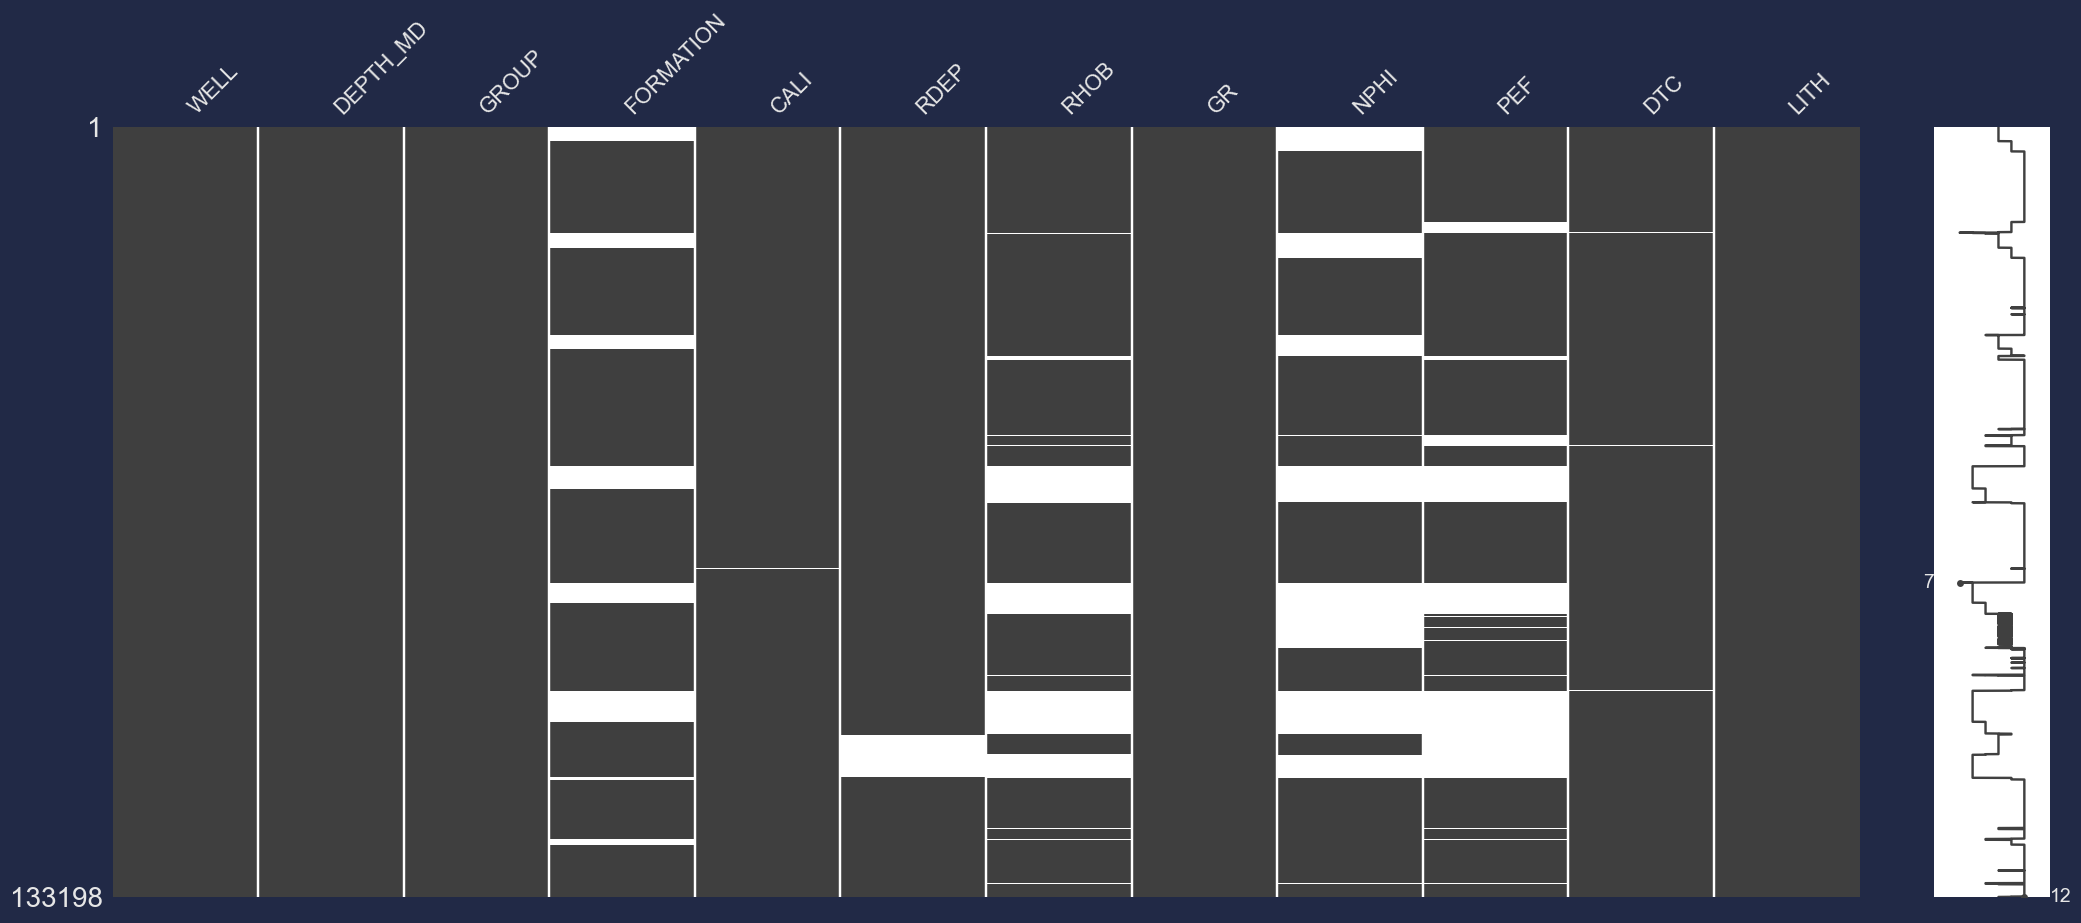

In [5]:
ms.matrix(df)

In [6]:
df = df.dropna()

In [7]:
len(df)

81586

<Axes: >

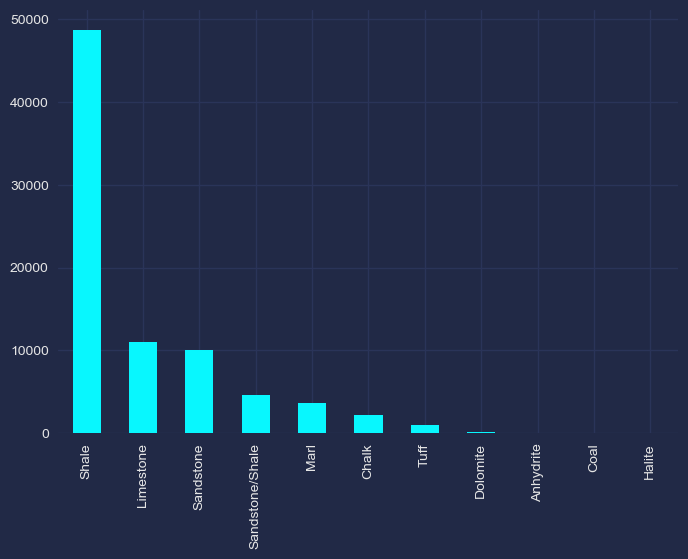

In [9]:
df.LITH.value_counts().plot.bar()

# <span style="font-weight:700;color:#fff;background-color:#003333;border-radius:10px;padding:10px"> Baseline Model <span>

In [11]:
# sklearn impor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [13]:
df.columns

Index(['WELL', 'DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RDEP', 'RHOB', 'GR',
       'NPHI', 'PEF', 'DTC', 'LITH'],
      dtype='object')

In [12]:
# build the model
clf = RandomForestClassifier()

In [14]:
X = df[['CALI', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y =df["LITH"]

In [16]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=.3, random_state=233, stratify=y)

In [18]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
train_acc = accuracy_score(clf.predict(X_train) , y_train)
test_acc = accuracy_score(clf.predict(X_test) , y_test)

In [20]:
train_acc,  test_acc

(1.0, 0.9303399248243177)

In [23]:
def evaluate(model):
    y_pred = model.predict(X_test)
    train_accuracy = accuracy_score(model.predict(X_train), y_train)
    test_accuracy = accuracy_score(y_pred , y_test )
    print(f"Test acc :{test_accuracy}\n Train acc : {train_accuracy}")
    clf_rpt = classification_report(y_test, y_pred)
    print(f"Classificaiton report \n{clf_rpt}")
    plt.figure(figsize=(15,15))
    cm = confusion_matrix(y_test,y_pred,labels= model.classes_)
    cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmd.plot();
    plt.xticks(rotation = 90);
    

Test acc :0.9303399248243177
 Train acc : 1.0
Classificaiton report 
                 precision    recall  f1-score   support

      Anhydrite       0.92      0.96      0.94        23
          Chalk       0.92      0.86      0.89       676
           Coal       0.81      0.76      0.79        17
       Dolomite       0.74      0.59      0.65        29
         Halite       0.80      0.67      0.73         6
      Limestone       0.93      0.89      0.91      3292
           Marl       0.89      0.85      0.87      1115
      Sandstone       0.92      0.90      0.91      3023
Sandstone/Shale       0.82      0.68      0.75      1373
          Shale       0.95      0.98      0.97     14612
           Tuff       0.87      0.70      0.77       310

       accuracy                           0.93     24476
      macro avg       0.87      0.80      0.83     24476
   weighted avg       0.93      0.93      0.93     24476



<Figure size 1500x1500 with 0 Axes>

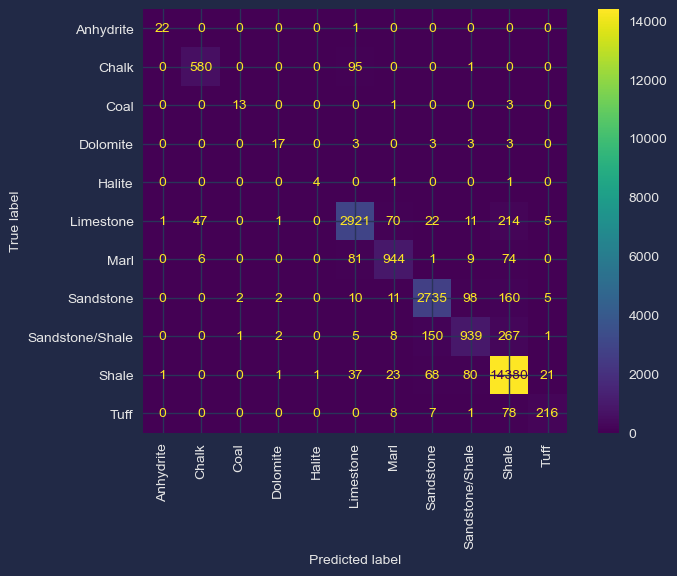

In [24]:
evaluate(clf)

# <span style="font-weight:700;color:#fff;background-color:#003333;border-radius:10px;padding:10px">Hyperparameter Tunning <span>

In [25]:
from sklearn.utils import compute_class_weight

class_labels = df.LITH.unique() # Example class labels

weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=df.LITH)



In [26]:
weights

array([7.36096575e-01, 1.52282293e-01, 1.62011994e+00, 6.75923548e-01,
       7.17302620e+00, 1.99647620e+00, 3.29055417e+00, 7.56827458e+01,
       1.27877743e+02, 3.70845455e+02, 9.88921212e+01])

In [27]:
class_labels

array(['Sandstone', 'Shale', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Chalk', 'Dolomite', 'Coal', 'Halite', 'Anhydrite'],
      dtype=object)

In [28]:
class_weights = { class_labels[i] : weights[i] for i in range(len(class_labels))}

In [29]:
class_weights

{'Sandstone': 0.7360965751199972,
 'Shale': 0.1522822932123825,
 'Sandstone/Shale': 1.6201199412208587,
 'Limestone': 0.6759235478819914,
 'Tuff': 7.173026200105504,
 'Marl': 1.9964762021289613,
 'Chalk': 3.2905541663305637,
 'Dolomite': 75.68274582560296,
 'Coal': 127.87774294670847,
 'Halite': 370.8454545454546,
 'Anhydrite': 98.89212121212121}

In [31]:
clf2 = RandomForestClassifier(class_weight=class_weights)

In [32]:
clf2.fit(X_train,y_train)

RandomForestClassifier(class_weight={'Anhydrite': 98.89212121212121,
                                     'Chalk': 3.2905541663305637,
                                     'Coal': 127.87774294670847,
                                     'Dolomite': 75.68274582560296,
                                     'Halite': 370.8454545454546,
                                     'Limestone': 0.6759235478819914,
                                     'Marl': 1.9964762021289613,
                                     'Sandstone': 0.7360965751199972,
                                     'Sandstone/Shale': 1.6201199412208587,
                                     'Shale': 0.1522822932123825,
                                     'Tuff': 7.173026200105504})

Test acc :0.9294410851446315
 Train acc : 1.0
Classificaiton report 
                 precision    recall  f1-score   support

      Anhydrite       0.88      1.00      0.94        23
          Chalk       0.92      0.86      0.89       676
           Coal       0.80      0.71      0.75        17
       Dolomite       0.84      0.55      0.67        29
         Halite       0.83      0.83      0.83         6
      Limestone       0.92      0.88      0.90      3292
           Marl       0.90      0.84      0.87      1115
      Sandstone       0.91      0.91      0.91      3023
Sandstone/Shale       0.83      0.67      0.74      1373
          Shale       0.95      0.99      0.97     14612
           Tuff       0.88      0.66      0.75       310

       accuracy                           0.93     24476
      macro avg       0.88      0.81      0.84     24476
   weighted avg       0.93      0.93      0.93     24476



<Figure size 1500x1500 with 0 Axes>

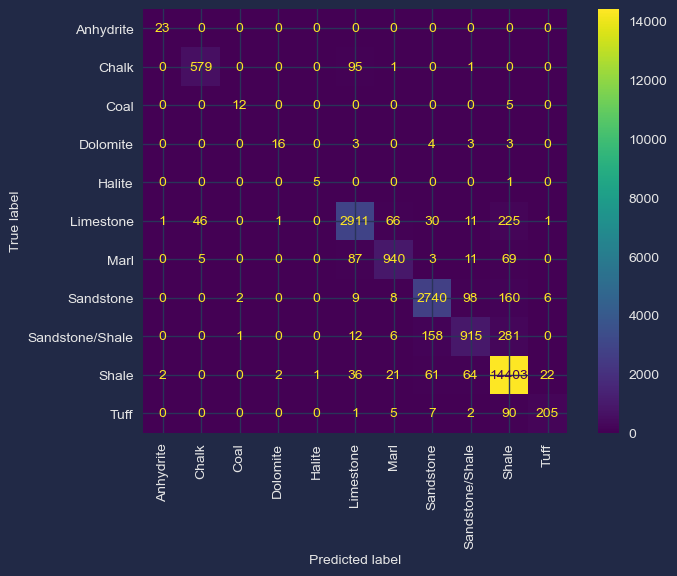

In [33]:
evaluate(clf2)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
accs = cross_val_score(clf2 , X_train, y_train, cv =5, scoring="accuracy")

In [37]:
accs.mean()

0.9250393976536507

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
RandomForestClassifier()

In [42]:
param_grid={
            "n_estimators":[20,50,75,100,200,300],
            "max_depth":[5,10,15,20,30,50],
            }

fr = RandomizedSearchCV(clf2,param_grid,cv=5, n_jobs=-1,scoring="acuraccy")


In [ ]:
fr.fit(X_train,y_train)

In [ ]:
fr.best_params_

In [ ]:
best_model = fr.best_estimator_

In [ ]:
from xg

In [43]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.4 MB/s eta 0:00:00


In [49]:
classes = { c:i  for i , c in enumerate(df.LITH.unique())}
classes 

{'Sandstone': 0,
 'Shale': 1,
 'Sandstone/Shale': 2,
 'Limestone': 3,
 'Tuff': 4,
 'Marl': 5,
 'Chalk': 6,
 'Dolomite': 7,
 'Coal': 8,
 'Halite': 9,
 'Anhydrite': 10}

In [45]:
from xgboost import XGBClassifier

In [52]:
y_train = y_train.replace(classes)
y_test = y_test.replace(classes)

In [63]:
m = XGBClassifier(n_estimators=1000,n_jobs=-1,tree_method='gpu_hist',reg_lambda=2,reg_alpha=2,max_depth=25, min_child_weight=8)
m.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
evaluate(m)